## Alzheimer stage classification
On a dans ce problème un dataset contenant des images IRM des cerveaux de personnes atteintes de la maladie d'Alzheimer. On a alors les 4 classes suivantes : 
- NonDemented : non atteint de démance
- VeryMildDemented : Démance très légère
- MildDemented : Légère démance
- ModerateDemented : Démence modérée

### Objectif de ce notebook
L'objectif de ce notebook est de mettre en place une analyse et un certain nombre de visualisation sur les données qu'on a.

In [14]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os

On commence par visualiser des images de chaque classes

In [21]:
def visu_irm(path) : 
    folders = os.listdir(path)
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(13,11))
    i = 1
    for folder in folders :
        path1 = os.path.join(path,folder)
        files = os.listdir(path1)
        index = np.random.randint(0, len(files) - 1)
        all_path = os.path.join(path1, files[index])
        image = cv.imread(all_path)
        plt.subplot(2,2,i)
        plt.imshow(image)
        plt.grid(False)
        plt.axis("off")
        plt.title(folder)
        i += 1

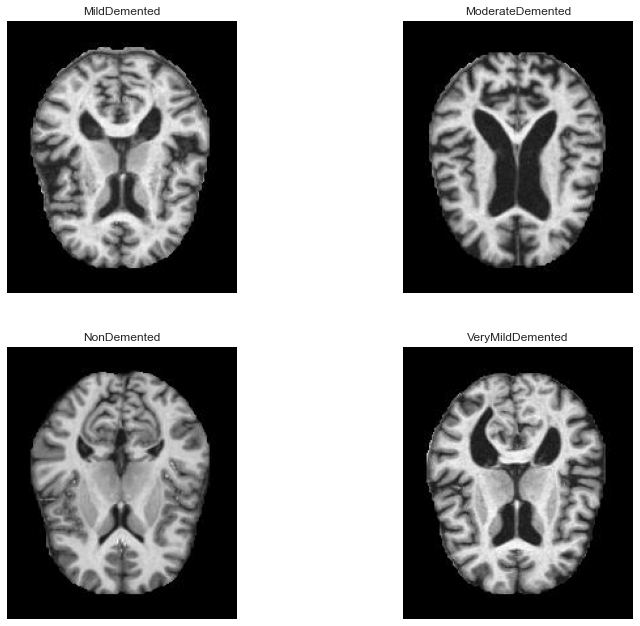

In [22]:
path_to_train = "./Dataset/train"
visu_irm(path=path_to_train)

On peut aussi observer les histogrammes des niveaux de gris pour voir qu'effectivement certains niveau de gris changent entre chaque classe

In [37]:
def hist_irm(path) : 
    folders = os.listdir(path)
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(19,9))
    i = 1
    for folder in folders :
        path1 = os.path.join(path,folder)
        files = os.listdir(path1)
        index = np.random.randint(0, len(files) - 1)
        all_path = os.path.join(path1, files[index])
        image = cv.imread(all_path)
        hist = cv.calcHist([image], [0], None, [256], [10, 256])
        plt.subplot(2,2,i)
        plt.hist(hist)
        plt.title(folder)
        i += 1

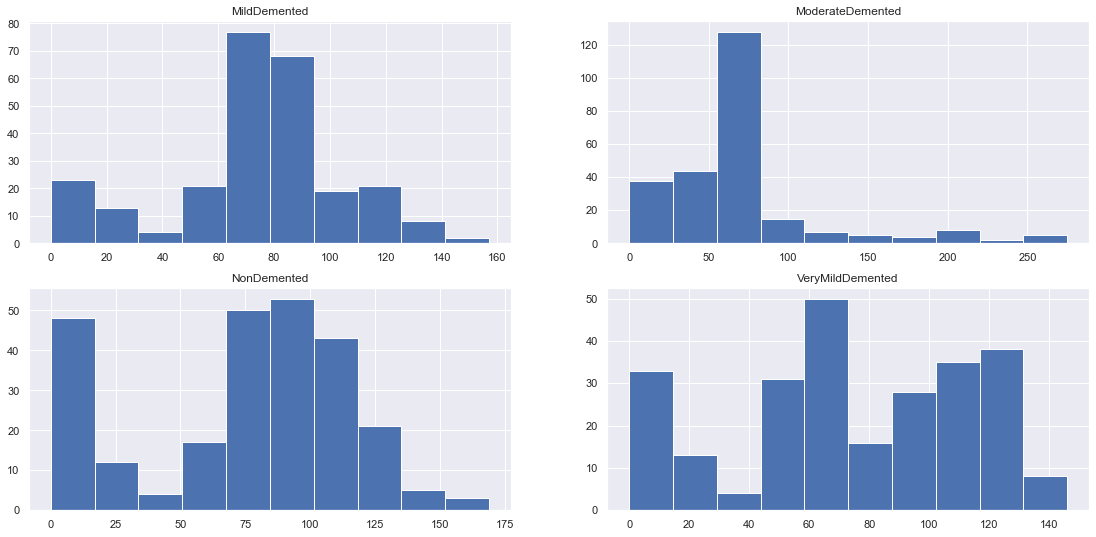

In [38]:
hist_irm(path=path_to_train)

On voit effectivement que la distribution change effectivement entre chaque classe tels qu'on peut observer ce qui est en total corrélation avec les images affichées plus haut. On peut appliquer une égalisation d'histogramme adaptative pour permettre l'amélioration des contrastes dans notre images (et qui peut alors être utilisé comme pré-processing) en utilisant le CLAHE (contrast limited adaptive histogram equalization)

In [39]:
def clahe_irm(path) : 
    folders = os.listdir(path)
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(13,11))
    i = 1
    for folder in folders :
        path1 = os.path.join(path,folder)
        files = os.listdir(path1)
        index = np.random.randint(0, len(files) - 1)
        all_path = os.path.join(path1, files[index])
        image = cv.imread(all_path)
        # CLAHE
        clahe = cv.createCLAHE(clipLimit=6, \
                    tileGridSize=(16,16))
        
        # On sépare les channels
        b,g,r = cv.split(image)

        # On applique séparément
        b = clahe.apply(b)
        g = clahe.apply(g)
        r = clahe.apply(r)

        # On refusionne
        image_clahe = cv.merge((b,g,r))
        plt.subplot(2,2,i)
        plt.imshow(image_clahe)
        plt.grid(False)
        plt.axis("off")
        plt.title(folder)
        i += 1

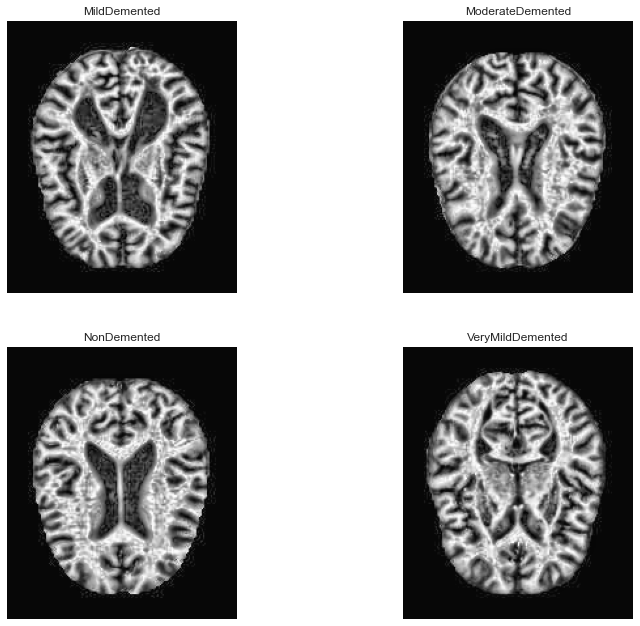

In [40]:
clahe_irm(path=path_to_train)

On voit bien que le contraste a grandement augmenté entre les photos originales et les photos traitées